# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
from tabula import read_pdf

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2024, 1)

In [3]:
year = 2023

In [4]:
# Parameters
year = 2023
overwrite = True


In [5]:
cur_year = 2023
last_month = 10 if year == cur_year else 12

In [6]:
pdf = f'data/{year}-PATH-Monthly-Ridership-Report.pdf'
pdf

'data/2023-PATH-Monthly-Ridership-Report.pdf'

In [7]:
with open('templates/PATH-Monthly-Ridership-Report.json', 'r') as f:
    rects = json.load(f)
rects

[{'y1': 121.284, 'x1': 70.016, 'y2': 245.247, 'x2': 568.926},
 {'y1': 261.316, 'x1': 71.546, 'y2': 407.469, 'x2': 569.691},
 {'y1': 482.459, 'x1': 70.781, 'y2': 603.36, 'x2': 568.161},
 {'y1': 620.96, 'x1': 70.781, 'y2': 761.757, 'x2': 569.691}]

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[121.284, 70.016, 245.247, 568.926],
 [261.316, 71.546, 407.469, 569.691],
 [482.459, 70.781, 603.36, 568.161],
 [620.96, 70.781, 761.757, 569.691]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
    ) 
    for month in range(1, last_month + 1)
}

tables

{1: [                    0          1       2       3       4       5
  0  Christopher Street     87,112   3,063   2,886   2,104   1,895
  1           9thStreet     76,151   2,712   2,419   1,805   1,607
  2          14thStreet    133,421   4,939   3,644   2,879   2,835
  3          23rdStreet    125,009   5,117   2,406   1,765   2,112
  4          33rdStreet    453,342  17,307  10,483   9,125   9,824
  5     UPTOWN SUBTOTAL    875,035  33,138  21,838  17,678  18,273
  6                 WTC    808,510  33,019  14,558  12,232  14,373
  7   NEW YORK SUBTOTAL  1,683,545  66,157  36,396  29,910  32,646,
                       0          1        2       3       4       5
  0               Newark    320,909   13,319   5,288   4,178   6,247
  1             Harrison    120,285    4,939   2,216   1,599   2,324
  2       Journal Square    416,924   16,114   9,731   7,336   9,516
  3         Grove Street    343,048   13,038   9,449   6,267   6,572
  4       Exchange Place    187,080    7,694   3

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
avgs = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,87112,3063,2886,2104,1895,2023-01-01
1,9thStreet,76151,2712,2419,1805,1607,2023-01-01
2,14thStreet,133421,4939,3644,2879,2835,2023-01-01
3,23rdStreet,125009,5117,2406,1765,2112,2023-01-01
4,33rdStreet,453342,17307,10483,9125,9824,2023-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,268150,10544,4949,3993,6970,2023-10-01
5,Pavonia/ Newport,322826,12756,5627,4567,9605,2023-10-01
6,Hoboken,448025,17486,8994,6781,10936,2023-10-01
7,NEW JERSEY SUBTOTAL,2626497,101966,51829,41461,70579,2023-10-01


In [12]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [13]:
avgs.dtypes

station                object
total                   int64
avg weekday             int64
avg sat                 int64
avg sun                 int64
avg holiday             int64
month          datetime64[ns]
dtype: object

In [14]:
sums = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[2:]
])
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,2810,61258,11546,10518,3790,2023-01-01
1,9thStreet,2456,54235,9677,9025,3214,2023-01-01
2,14thStreet,4304,98776,14578,14397,5670,2023-01-01
3,23rdStreet,4033,102336,9625,8823,4225,2023-01-01
4,33rdStreet,14624,346138,41933,45623,19648,2023-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,8650,221420,19796,19964,6970,2023-10-01
5,Pavonia/ Newport,10414,267876,22508,22837,9605,2023-10-01
6,Hoboken,14452,367211,35974,33904,10936,2023-10-01
7,NEW JERSEY SUBTOTAL,84726,2141298,207316,207304,70579,2023-10-01


In [15]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [16]:
sums.dtypes

station                  object
avg daily                 int64
total weekday             int64
total sat                 int64
total sun                 int64
total holiday             int64
month            datetime64[ns]
dtype: object

In [17]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2023-01-01 Christopher Street        2810         3063     2886     2104   
           9thStreet                 2456         2712     2419     1805   
           14thStreet                4304         4939     3644     2879   
           23rdStreet                4033         5117     2406     1765   
           33rdStreet               14624        17307    10483     9125   
...                                   ...          ...      ...      ...   
2023-10-01 Exchange Place            8650        10544     4949     3993   
           Pavonia/ Newport         10414        12756     5627     4567   
           Hoboken                  14452        17486     8994     6781   
           NEW JERSEY SUBTOTAL      84726       101966    51829    41461   
           MONTHLY TOTAL           154725       185148    95919    79249   

                                avg holiday    total  total weekday  \
month      station                                                    
2023-01-01 Christopher Street          1895    87112          61258   
           9thStreet                   1607    76151          54235   
           14thStreet                  2835   133421          98776   
           23rdStreet                  2112   125009         102336   
           33rdStreet                  9824   453342         346138   
...                                     ...      ...            ...   
2023-10-01 Exchange Place              6970   268150         221420   
           Pavonia/ Newport            9605   322826         267876   
           Hoboken                    10936   448025         367211   
           NEW JERSEY SUBTOTAL        70579  2626497        2141298   
           MONTHLY TOTAL             128467  4796487        3888101   

                                total sat  total sun  total holiday  
month      station                                                   
2023-01-01 Christopher Street       11546      10518           3790  
           9thStreet                 9677       9025           3214  
           14thStreet               14578      14397           5670  
           23rdStreet                9625       8823           4225  
           33rdStreet               41933      45623          19648  
...                                   ...        ...            ...  
2023-10-01 Exchange Place           19796      19964           6970  
           Pavonia/ Newport         22508      22837           9605  
           Hoboken                  35974      33904          10936  
           NEW JERSEY SUBTOTAL     207316     207304          70579  
           MONTHLY TOTAL           383676     396243         128467  

[170 rows x 10 columns]

In [18]:
path = f'data/{year}.pqt'
df.to_parquet(path)

In [19]:
import plotly.express as px
from IPython.display import Image

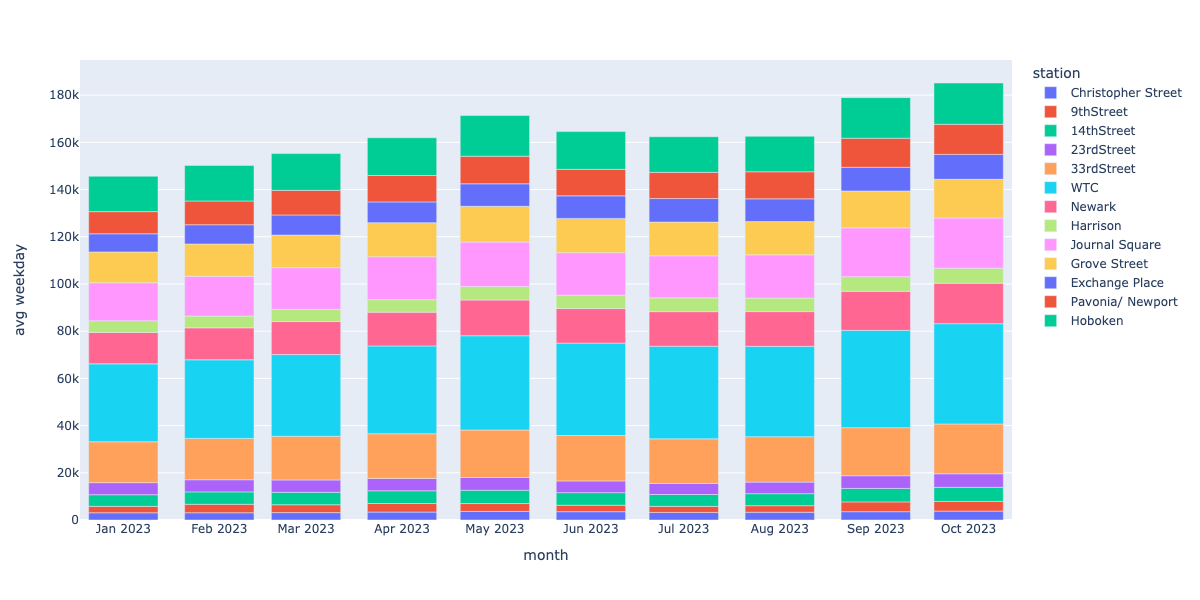

In [20]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))